<a href="https://colab.research.google.com/github/SivaLokam/PGDML-/blob/master/upgrad_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN and Transfer Learning Revision
Agenda
- CNN: Concept Revision
  - What is CNN? & Why is it used
  - What are filters/feature detectors
  - Padding & striding
  - Equation of a basic model
- Transfer Learning : Concept Revision
  - Discussion of various architecture
    - AlexNet
    - VGGNet
    - GoogleNet
    - ResNet
  - Code Walkthrough of Transfer Learning on Image Data
    - How to import the dataset
    - How to preprocess it
    - Image augmentation
    - Setting up the model
    - Training & Testing it




# What are CNNs and Why we use them.

The need for using CNNs arose from a better representation learning for image analysis.

Representation Learning is a technique that allows a system to automatically find relevant features for a given task. Replaces manual feature engineering. There are several techniques for this:

*   Unsupervised (K-means, PCA, …)
*   Supervised (Sup. Dictionary learning, Neural Networks!)


A question arises then why not simple NN like MLP why do we need to use a special type of NN like CNN ?

There are several reasons,

### Image of a MLP network

<center><img src='https://miro.medium.com/max/500/1*BQ0SxdqC9Pl_3ZQtd3e45A.png' height =300 weight=300> </center>

1.   MLPs use one perceptron(node) for each input (e.g. pixel in an image, multiplied by 3 in RGB case). The amount of weights rapidly becomes unmanageable for large images. 
  - For a 224 x 224 pixel image with 3 color channels there are around 150,000 weights that must be trained! As a result, difficulties arise whilst training and overfitting can occur.
2.   MLPs are translation invariant.
  -  MLP will try to correct itself and assume that a cat will always appear in this section of the image.
3.   Loss of spatial information when image is flattened.


<center><img src='https://miro.medium.com/max/2274/1*xI7n9Waf9gxQWi32ddOmRA.png' height =300 weight=300> </center>

---

Biological neurons in the visual cortex respond to specific patterns in small regions of the visual field called receptive fields; as the visual signal makes its way through consecutive brain modules, neurons respond to more complex patterns in larger receptive fields.

<center><img height=200 width=600 src="https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_1401.png"></img></center>



### Padding 
In order for a layer to have the same height and width as the previous layer, it is common to add zeros around the inputs, as shown in the diagram. This is called zero padding.

A neuron located in row i, column j of a given layer is connected to the outputs of the neurons in the previous layer located in rows i to i + fh – 1, columns j to j + fw – 1, where fh and fw are the height and width of the receptive field.

<img height=200 width=300 src="https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_1403.png"></img>


If the input is n X n and the filter size is f X f, then the output size will be (n-f+1) X (n-f+1):

- Input: n X n
- Filter size: f X f
- padding: p
- Output: 
  - (n-f+1) X (n-f+1)  # Valid padding
  - (n+2p-f+1) X (n+2p-f+1) # Same Padding

There are primarily two disadvantages here:

- Every time we apply a convolutional operation, the size of the image shrinks
- Pixels present in the corner of the image are used only a few number of times during convolution as compared to the central pixels. Hence, we do not focus too much on the corners since that can lead to information loss


### Strides
It is also possible to connect a large input layer to a much smaller layer by spacing out the receptive fields, as shown.

This dramatically reduces the model’s computational complexity. The shift from one receptive field to the next is called the stride.

A neuron located in row i, column j in the upper layer is connected to the outputs of the neurons in the previous layer located in rows i × sh to i × sh + fh – 1, columns j × sw to j × sw + fw – 1, where sh and sw are the vertical and horizontal strides.

The dimensions for stride s will be:

- Input: n X n
- Padding: p
- Stride: s
- Filter size: f X f
- Output: [(n+2p-f)/s+1] X [(n+2p-f)/s+1]

Stride helps to reduce the size of the image, a particularly useful feature.

 

<img height=200 width=300 src="https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_1404.png"></img>

### Filters
A neuron’s weights can be represented as a small image the size of the receptive field these are called filters

A layer full of neurons using the same filter outputs a feature map, which highlights the areas in an image that activate the filter the most. 

During training the convolutional layer will automatically learn the most useful filters for its task, and the layers above will learn to combine them into more complex patterns.


### Stacking Multiple Feature Maps
A convolutional layer simultaneously applies multiple trainable filters to its inputs, making it capable of detecting multiple features anywhere in its inputs.

### Convolutions over Volumne
https://www.youtube.com/watch?v=KTB_OFoAQcc


Generalized dimensions can be given as:

- Input: n X n X nc
- Filter: f X f X nc
- Padding: p
- Stride: s
- Output: [(n+2p-f)/s+1] X [(n+2p-f)/s+1] X nc’

Here, nc is the number of channels in the input and filter, while nc’ is the number of filters

### Parameter Sharing and Local connectivity in CNNs

<img src="https://miro.medium.com/max/955/1*mcBbGiV8ne9NhF3SlpjAsA.png"></img>

For a particular feature map, each neuron is connected only to a small chunk of the input image and all the neurons have the same connection weights. So again coming back to the differences between CNN and a neural network.

Parameter sharing is sharing of weights by all neurons in a particular feature map.
Local connectivity is the concept of each neural connected only to a subset of the input image (unlike a neural network where all the neurons are fully connected)
This helps to reduce the number of parameters in the whole system and makes the computation more efficient.



Specifically, a neuron located in row i, column j of the feature map k in a given convolutional layer l is connected to the outputs of the neurons in the previous layer l – 1, located in rows i × sh to i × sh + fh – 1 and columns j × sw to j × sw + fw – 1, across all feature maps (in layer l – 1). Note that all neurons located in the same row i and column j but in different feature maps are connected to the outputs of the exact same neurons in the previous layer.


## Convolutional Layer in  Tensorflow
In TensorFlow, each input image is typically represented as a 3D tensor of shape [height, width, channels]. A mini-batch is represented as a 4D tensor of shape [mini-batch size, height, width, channels]. The weights of a convolutional layer are represented as a 4D tensor of shape [fh, fw, fn′, fn]. The bias terms of a convolutional layer are simply represented as a 1D tensor of shape [fn].

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import numpy as np
import tensorflow as tf
from tensorflow import keras

TensorFlow 2.x selected.


In [0]:
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg")/255
flower = load_sample_image("flower.jpg")/255

images = np.array([china, flower])
batch_size, height, width, channels = images.shape

In [0]:
print(height)
print(width)

427
640


In [0]:
#Create two filters
filters = np.zeros(shape = (7, 7, channels, 5), dtype= np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding="VALID")

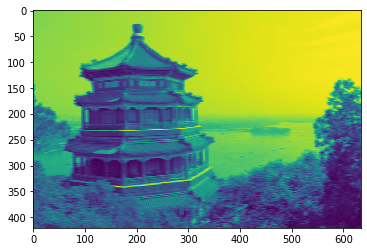

In [0]:
import matplotlib.pyplot as plt
plt.imshow(outputs[0, :, :, 1])

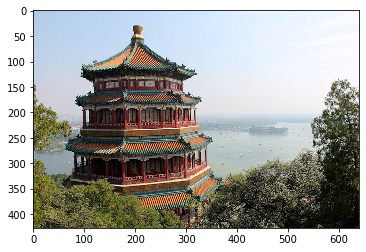

In [0]:
plt.imshow(images[0])

The tf.nn.conv2d() line deserves a bit more explanation:

- images is the input mini-batch (a 4D tensor, as explained earlier).

- filters is the set of filters to apply (also a 4D tensor, as explained earlier).

- strides is equal to 1, but it could also be a 1D array with four elements, where the two central elements are the vertical and horizontal strides (sh and sw). The first and last elements must currently be equal to 1. They may one day be used to specify a batch stride (to skip some instances) and a channel stride (to skip some of the previous layer’s feature maps or channels).

- padding must be either "same" or "valid":

  If set to "same", the convolutional layer uses zero padding if necessary. The output size is set to the number of input neurons divided by the stride, rounded up. [ ceil(input_shape/stride) ]

  <img height=300 width=400 src="https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_1407.png"></img>



In real use cases however you would hardly create seperate variables to define your filters or its related parameters. We can easily do these customizations while calling our cnn layer.

```
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,
                           padding="same", activation="relu")
```

## Memory Requirements
CNNs requires huge amount of RAM due to large number of training parameters that are required to build the network.

If training crashes because of an out-of-memory error, you can try reducing the mini-batch size. Alternatively, you can try reducing dimensionality using a stride, or removing a few layers. Or you can try using 16-bit floats instead of 32-bit floats. Or you could distribute the CNN across multiple devices.

## Pooling Layer
Their goal is to subsample (i.e., shrink) the input image in order to reduce the computational load, the memory usage, and the number of parameters (thereby limiting the risk of overfitting).

Just like in convolutional layers, each neuron in a pooling layer is connected to the outputs of a limited number of neurons in the previous layer, located within a small rectangular receptive field. 
- You must define 
  - its size, 
  - the stride, 
  - and the padding type
- A pooling neuron has no weights; all it does is aggregate the inputs using an aggregation function such as the max or mean.

In summary, the hyperparameters for a pooling layer are:

Filter size
Stride
Max or average pooling
If the input of the pooling layer is nh X nw X nc, then the output will be [{(nh – f) / s + 1} X {(nw – f) / s + 1} X nc].

A pooling layer typically works on every input channel independently, so the output depth is the same as the input depth.

A problem with the output feature maps is that they are sensitive to the location of the features in the input. One approach to address this sensitivity is to down sample the feature maps. This has the effect of making the resulting down sampled feature maps more robust to changes in the position of the feature in the image, referred to by the technical phrase “local translation invariance.”

Pooling layers provide an approach to down sampling feature maps by summarizing the presence of features in patches of the feature map. Two common pooling methods are average pooling and max pooling that summarize the average presence of a feature and the most activated presence of a feature respectively.

In [0]:
# Tensorflow implementation
maxpool = keras.layers.MaxPool2D(pool_size = 2)
# Strides defaults to kernel size
# padding defaults to "valid" i.e. no padding at all.



The pooling operation described above and the one which is part of the keras
low level API is generally spatial in nature, but we can also have depth pooling(both max and average) and it can help the CNN to be invariant to various features.

The depthwise max pooling layer would ensure that the output is the same regardless of the rotation. The CNN could similarly learn to be invariant to anything else: thickness, brightness, skew, color, and so on.

<img height=500 width=400 src="https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_1410.png"></img>

keras currently doesn't support depth wise pooling but can TF's low-level Deep learning API does

We can use tf.nn.max_pool() and wrap it in the Keras Lambda function to build a custom function and use it part of the keras pipeline.

Specify the kernel size and strides as 4-tuples (i.e., tuples of size 4).
- The first three values of each should be 1: this indicates that the kernel size and stride along the batch, height, and width dimensions should be 1. 
- The last value should be whatever kernel size and stride you want along the depth dimension—for example, 3 (this must be a divisor of the input depth, strictly)

```
depth_pool = keras.layers.Lambda(
    lambda X: tf.nn.max_pool(X, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3),
                             padding="valid"))
```

### Global Pool Averaging
One last type of pooling layer that you will often see in modern architectures is the global average pooling layer. It works very differently: all it does is compute the mean of each entire feature map.

It can be used as output layers.

```
global_avg_pool = keras.layers.GlobalAvgPool2D()
```

# CNN Architectures

<img src="https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_1411.png"></img>

### Kernel Size
A common mistake is to use convolution kernels that are too large. For example, instead of using a convolutional layer with a 5 × 5 kernel, stack two layers with 3 × 3 kernels: it will use fewer parameters and require fewer computations, and it will usually perform better. One exception is for the first convolutional layer: it can typically have a large kernel (e.g., 5 × 5), usually with a stride of 2 or more: this will reduce the spatial dimension of the image without losing too much information, and since the input image only has three channels in general, it will not be too costly.

### Number of Kernels

It is a common practice to double the number of filters after each pooling layer: if a pooling layer divides each spatial dimension by the same factor i.e 2


## AlexNet (2012)

Ref :- https://www.learnopencv.com/understanding-alexnet/

Features:-
- Stacking Conv Layer:- It was first to stack conv layer one after another, different from the general norm of conv layer followed by max pooling layer.
- Regularization :- Dropouts and Data Augmentation (Data augmentation artificially increases the size of the training set by generating many realistic variants of each training instance)
- Pooling :- Author used overlapping max-pooling layers (3*3 with stride of 2), this help reduced the error rate in the imagenet tasl.
- Activation Functions :- ReLU Activation, as compared to generally used activation functions like tanh, sigmoid. ReLu could achieve results faster without saturating.
- Normalization :- AlexNet introduced competitive normalization step after the ReLU step aka local response normalization (LRN). The most strongly activated neurons inhibit other neurons located at the same position in neighboring feature maps.
  This encourages different feature maps to specialize, pushing them apart and forcing them to explore a wider range of features, ultimately improving generalization. 

  In AlexNet, the hyperparameters are set as follows: r = 2, α = 0.00002, β = 0.75, and k = 1. This step can be implemented using the tf.nn.local_response_normalization() function (which you can wrap in a Lambda layer if you want to use it in a Keras model).

https://drive.google.com/file/d/1qY-qtR3Ud7MJU9fBEvGYmtN9F10DwzPW/view?usp=sharing





## GoogleNet -2014
- GoogleNet Primary Innovation was Inception Network.
- https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202
Ref:- https://medium.com/coinmonks/paper-review-of-googlenet-inception-v1-winner-of-ilsvlc-2014-image-classification-c2b3565a64e7

Features:-
- Inception Module:- 

<img height=300 width=400 src="https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_1413.png"></img>
  - The notation “3 × 3 + 1(S)” means that the layer uses a 3 × 3 kernel, stride 1, and "same" padding.
  - The input signal is first copied and fed to four different layers. 
  - All convolutional layers use the ReLU activation function.
  - Note that the second set of convolutional layers uses different kernel sizes (1 × 1, 3 × 3, and 5 × 5), allowing them to capture patterns at different scales.
  - Also note that every single layer uses a stride of 1 and "same" padding (even the max pooling layer), so their outputs all have the same height and width as their inputs. This makes it possible to concatenate all the outputs along the depth dimension in the final depth concatenation layer.
  - This concatenation layer can be implemented in TensorFlow using the tf.concat() operation, with axis=3 (the axis is the depth).
  - 1X1 Convolution
    - Although they cannot capture spatial patterns, they can capture patterns along the depth dimension.
    - Each pair of convolutional layers ([1 × 1, 3 × 3] and [1 × 1, 5 × 5]) acts like a single powerful convolutional layer, capable of capturing more complex patterns
    - Bottleneck layers:- A problem with deep convolutional neural networks is that the number of feature maps often increases with the depth of the network. This problem can result in a dramatic increase in the number of parameters and computation required when larger filter sizes are used, such as 5×5 and 7×7.

      To address this problem, a 1×1 convolutional layer can be used that offers a channel-wise pooling, often called feature map pooling or a projection layer. This simple technique can be used for dimensionality reduction, decreasing the number of feature maps whilst retaining their salient features.

      https://drive.google.com/file/d/12sEfad7FdUeZ4lRWU3GFtIINNXpqRPy5/view?usp=sharing

  - The number of convolutional kernels aka filters for each convolutional layer is a hyperparameter. Unfortunately, this means that you have six more hyperparameters to tweak for every inception layer you add.

    <img height=400 width=500 src="https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_1414.png"></img>

  - The number of feature maps( number of filters used) output by each convolutional layer and each pooling layer is shown before the kernel size.
  - The six numbers in the inception modules represent the number of feature maps output by each convolutional layer in the module
  - The local response normalization layer ensures that the previous layers learn a wide variety of features.
  - Tall stack of nine inception modules, interleaved with a couple max pooling layers to reduce dimensionality and speed up the net.
  - The global average pooling layer outputs the mean of each feature map: this drops any remaining spatial information, which is fine because there was not much spatial information left at that point. Indeed, GoogLeNet input images are typically expected to be 224 × 224 pixels, so after 5 max pooling layers, each dividing the height and width by 2, the feature maps are down to 7 × 7


This diagram is slightly simplified: the original GoogLeNet architecture also included two auxiliary classifiers plugged on top of the third and sixth inception modules. They were both composed of one average pooling layer, one convolutional layer, two fully connected layers, and a softmax activation layer. During training, their loss (scaled down by 70%) was added to the overall loss. The goal was to fight the vanishing gradients problem and regularize the network. However, it was later shown that their effect was relatively minor.

## VGGNet - 2014

Ref:- https://medium.com/coinmonks/paper-review-of-vggnet-1st-runner-up-of-ilsvlc-2014-image-classification-d02355543a11

It had a very simple and classical architecture, with 2 or 3 convolutional layers and a pooling layer, then again 2 or 3 convolutional layers and a pooling layer, and so on (reaching a total of just 16 or 19 convolutional layers, depending on the VGG variant), plus a final dense network with 2 hidden layers and the output layer. It used only 3 × 3 filters, but many filters.

# ResNet - 2015
Deep neural networks are difficult to train. They also have vanishing or exploding gradient problems. Batch normalization helps, but with the increase in depth, the network has trouble reaching convergence due to **Degradation Problem**.

Why ResNets Work ?
https://www.youtube.com/watch?v=RYth6EbBUqM

The idea is adding a skip connection or a resnet block we are allowing the NN model to output atleast the things that it has already learned.
- It means skipping some layers in the neural network and feeding the output of one layer to another layer skipping a few layers in between. Usually, some information is captured in the initial layers and is required for reconstruction during the up-sampling done using the fully connected network layer. If we would not have used the skip architecture that information would have been lost (or should say would have turned too abstract for it to be used further). So an information that we have in the primary layers can be fed explicitly to the later layers using the skip architecture.

### ResNet Architecture

Each residual unit is composed of two convolutional layers (and no pooling layer!), with Batch Normalization (BN) and ReLU activation, using 3 × 3 kernels and preserving spatial dimensions (stride 1, "same" padding).

<img height=300 width=450 src="https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_1417.png"></img>

Note that the number of feature maps is doubled every few residual units, at the same time as their height and width are halved (using a convolutional layer with stride 2). When this happens, the inputs cannot be added directly to the outputs of the residual unit because they don’t have the same shape. To solve this problem, the inputs are passed through a 1 × 1 convolutional layer with stride 2 and the right number of output feature maps.

<img width=400 height=300 src="https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/assets/mls2_1418.png"></img>



# Pretrained models for transfer learning

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os 
import sys
import pathlib
os.chdir("/content/drive/My Drive/upgrad/transfer_learning") 
sys.path.append("/content/drive/My Drive/upgrad/transfer_learning")

data_dir = pathlib.Path("./data/10-monkey-species")

In [0]:
# We can use pretrained models from keras and not create everything from scratch
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2


### Monkey Dataset

The dataset consists of two files, training and validation. Each folder contains 10 subforders labeled as n0~n9, each corresponding a species form Wikipedia's monkey cladogram.

```
Label mapping:
n0, alouatta_palliata
n1, erythrocebus_patas
n2, cacajao_calvus 
n3, macaca_fuscata   
n4, cebuella_pygmea
n5, cebus_capucinus
n6, mico_argentatus
n7, saimiri_sciureus 
n8, aotus_nigriceps
n9, trachypithecus_johnii
```




In [0]:
# Let's quickly check the total number of image files in the dataset
image_count = len(list(data_dir.glob('**/*/*.jpg')))

In [0]:
str(list(data_dir.glob('**//*/training'))[0])

'data/10-monkey-species/training/training'

In [0]:
# Finding all the class names for the image classification task
CLASS_NAMES = np.array([item.name for item in data_dir.glob('**//*/training/*')])
CLASS_NAMES

array(['n6', 'n4', 'n5', 'n2', 'n3', 'n1', 'n8', 'n9', 'n7', 'n0'],
      dtype='<U2')

In [0]:
# Display various sample files from each class
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

################


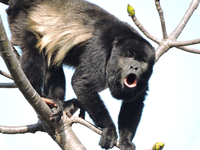

################
################


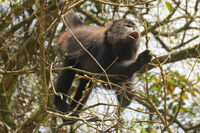

################
################


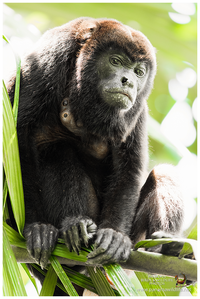

################


In [0]:
n = list(data_dir.glob('**/*/n0/*'))

basewidth = 200
for image_path in n[:3]:
  img = Image.open(str(image_path))
  wpercent = (basewidth/float(img.size[0]))
  hsize = int((float(img.size[1])*float(wpercent)))
  img = img.resize((basewidth,hsize), Image.ANTIALIAS)
  print("################")
  display.display(img)
  print("################")

# Why Do we Do Transfer Learning ?

The intuition behind transfer learning is that if a model trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch training a large model on a large dataset.

# How do we do transfer learning ?
- Feature Extraction
  - This is done by instantiating the pre-trained model and adding a fully-connected classifier on top. The pre-trained model is "frozen" and only the weights of the classifier get updated during training. In this case, the convolutional base extracted all the features associated with each image and you just trained a classifier that determines the image class given that set of extracted features.
- Fine Tuning
  - In this case, you tuned your weights such that your model learned high-level features specific to the dataset. This technique is usually recommended when the training dataset is large and very similar to the original dataset that the pre-trained model was trained on.

We will look at both the methods, but before that let us get our monkey dataset ready.

# Loading Training Data
We can load the training data using 
- keras.preprocessing module
- tf.data

tf.data is faster than keras.preprocessing module and has fine grained control to handle the datasets(like prefetching) and is highly compatible with rest of the tf ecosystem.


In [0]:
# Keras.preprocessing
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

BATCH_SIZE = 32
# For VGG19 the input shape and size by deafult is 244,244 and hence the same is kept
IMG_HEIGHT = 224 # This should map with the height and width of the pretrained model
IMG_WIDTH = 224 # This should map with the height and width of the pretrained model
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

train_data_gen = image_generator.flow_from_directory(directory=str(list(data_dir.glob('**//*/training'))[0]),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 1098 images belonging to 10 classes.


In [0]:
# We can inspect how a batch is created
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      # plt.imshow(cv2.cvtColor(image_batch[n], cv2.COLOR_BGR2RGB))
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

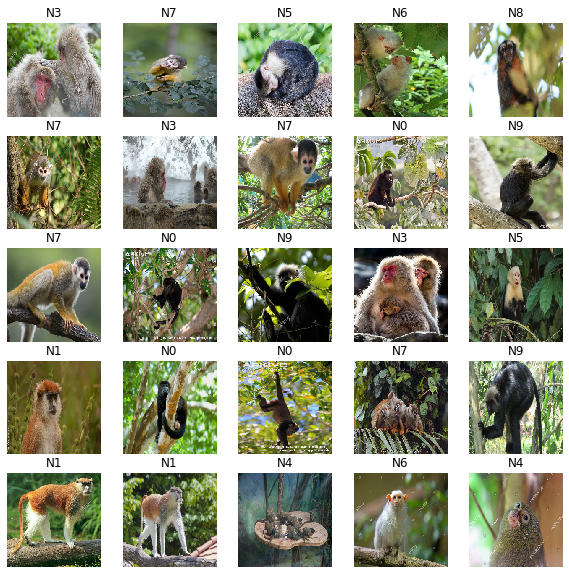

In [0]:
# Since the function returns a generator we can use a next call on the object to generate a batch
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)
#note make sure you call the iterator again before going for training

In [0]:
# We can do a similar process using tf.data pipeline as well
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/training/*/*'))
# The image generator class in keras maps the images to its respective folder
# To do the same in tfds let us create a function
# For this we use Dataset.map

def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  return parts[-2] == CLASS_NAMES

def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  img = tf.image.convert_image_dtype(img, tf.float32)
  # resize the image to the desired size.
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [0]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
AUTOTUNE = tf.data.experimental.AUTOTUNE
labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [0]:
for image, label in labeled_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (224, 224, 3)
Label:  [ True False False False False False False False False False]


In [0]:
for f in list_ds.take(1):
  print(f.numpy())

b'data/10-monkey-species/training/training/n4/n4051.jpg'


To train a model with this dataset you will want the data:

- To be well shuffled.
- To be batched.
- Batches to be available as soon as possible.(prefetching)

Note we saw the first two in keras.preprocessing pipeline , but not prefetching


In [0]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  ds = ds.repeat()

  ds = ds.batch(BATCH_SIZE)

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  # ds = ds.prefetch(1) (prefetching might be a problem with colab)

  return ds

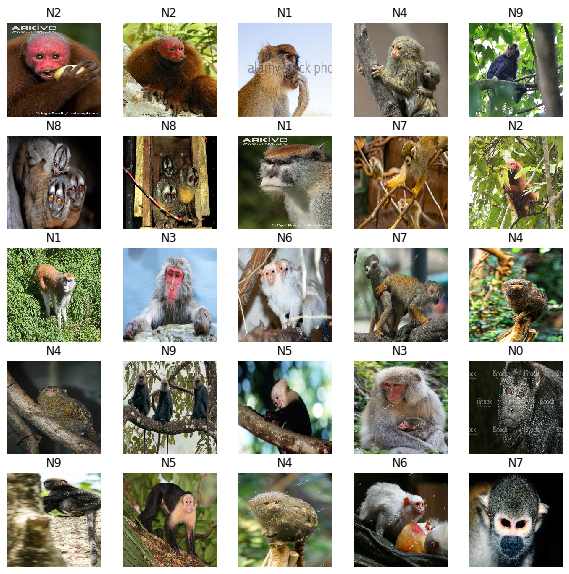

In [0]:
train_ds = prepare_for_training(labeled_ds)

image_batch, label_batch = next(iter(train_ds))
show_batch(image_batch.numpy(), label_batch.numpy())

# Pre-Processing and Augmentation
We have seen earlier in keras.preprocessing module that how easy it is to pre-process the data, which is as easy as passing an argument.



```
# This is formatted as code
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
```

There is lot more we can do here

https://keras.io/preprocessing/image/

#### But what happens in the case of tf.data pipeline ?
We need to write our own functions and map our data to it using "map" function.


In [0]:
def central_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]])
    top_crop = (shape[0] - min_dim) // 4
    bottom_crop = shape[0] - top_crop
    left_crop = (shape[1] - min_dim) // 4
    right_crop = shape[1] - left_crop
    return image[top_crop:bottom_crop, left_crop:right_crop]

def random_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]]) * 90 // 100
    return tf.image.random_crop(image, [min_dim, min_dim, 3])

def preprocess(image, label, randomize=False):
    if randomize:
        cropped_image = random_crop(image)
        cropped_image = tf.image.random_flip_left_right(cropped_image)
    else:
        cropped_image = central_crop(image)
    resized_image = tf.image.resize(cropped_image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

In [0]:
train_ds

<DatasetV1Adapter shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.bool)>

In [0]:
# Let’s apply this preprocessing function to all three datasets, 
# shuffle the training set, and add batching and prefetching to all the datasets
batch_size = 32
train_set = train_ds.map(preprocess)

In [0]:
image_batch, label_batch = next(iter(train_set))
show_batch(image_batch.numpy(), label_batch.numpy())

The keras.preprocessing.image.ImageDataGenerator class makes it easy to load images from disk and augment them in various ways this is very convenient for simple projects. 

However, building a tf.data pipeline has many advantages: it can read the images efficiently (e.g., in parallel) from any source, not just the local disk; you can manipulate the Dataset as you wish; and if you write a preprocessing function based on tf.image operations, this function can be used both in the tf.data pipeline and in the model you will deploy to production

# Doing Transfer Learning

We are going to use the VGG19 model for showcasing the transfer learning

One can utilize the tf.keras.applications object to download the VGG19 model in Keras format with trained parameters. To do so, run the following code:



In [0]:
IMG_SHAPE = (224, 224, 3)
base_model = tf.keras.applications.vgg19.VGG19(weights='imagenet', 
                                            include_top=False, 
                                            input_shape=IMG_SHAPE)


80142336/80134624 [==============================] - 1s 0us/step


- The weights argument ‘imagenet’ denotes that the weights to be used are those generated by being trained on the ImageNet dataset. 

- The include_top argument states that we only want the CNN-feature maps part of the VGG19 model – not its final GAP and dense connected layers. 

- Finally, we need to specify what input shape we want the model being setup to receive. 

- Next, we need to disable the training of the parameters within this Keras model.

In [0]:
# At the begining of training we need to freeze the weights of pretrained layers
for layer in base_model.layers:
    layer.trainable = False

Note :- Since our model uses the base model’s layers directly, rather than the base_model object itself, setting base_model.trainable=False would have no effect.


In [0]:
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(len(CLASS_NAMES), activation="softmax")(avg)
model = keras.Model(inputs=base_model.input, outputs=output)

In [0]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
# Let's take a look at the final model architecture
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

We see the total parameters to be over 20M. But the trainable parameters are quite low, they are only 5K in number, which is a good news :)

In [0]:
optimizer = keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model.compile(loss="categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])


We are using keras.preprocessing pipeline dataset output for the demonstration.
But if somebody is interested in using tf.data then they can run the following code:-


```
# This is formatted as code
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=5)
```
Also make sure that the loss function you are using for compiling is sparse_categorical_crossentropy


In [0]:
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) # Generator for our validation data


BATCH_SIZE = 32
# For VGG19 the input shape and size by deafult is 244,244 and hence the same is kept
IMG_HEIGHT = 224 # This should map with the height and width of the pretrained model
IMG_WIDTH = 224 # This should map with the height and width of the pretrained model
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)


In [0]:
train_data_gen = train_image_generator.flow_from_directory(directory=str(list(data_dir.glob('**//*/training'))[0]),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 1098 images belonging to 10 classes.


In [0]:
val_data_gen = validation_image_generator.flow_from_directory(directory=str(list(data_dir.glob('**//*/validation'))[0]),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 272 images belonging to 10 classes.


Use the fit_generator method of the ImageDataGenerator class to train the network.

In [0]:
TOTAL_TRAIN = len(list(data_dir.glob('**//*/training/*/*.jpg')))
TOTAL_VAL = len(list(data_dir.glob('**//*/validation/*/*.jpg')))

In [0]:
EPOCHS = 5

In [0]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=TOTAL_TRAIN // BATCH_SIZE, # we can also cover x% of the data
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=TOTAL_VAL // BATCH_SIZE
)

Epoch 1/5
34/34 [==============================] - 2798s 82s/step - loss: 11.1432 - accuracy: 0.1088 - val_loss: 13.0238 - val_accuracy: 0.1484
Epoch 2/5
 5/34 [===>..........................] - ETA: 38:02 - loss: 14.0051 - accuracy: 0.1000


# Visualize training results
Now visualize the results after training the network.



In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


We can unfreeze the top layers on training and continue training (don’t forget to compile the model when you freeze or unfreeze layers). 
This time we use :-
- A much lower learning rate to avoid damaging the pretrained weights
 

In [0]:
for layer in base_model.layers:
    layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,
                                 nesterov=True, decay=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [0]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=TOTAL_TRAIN // BATCH_SIZE, # we can also cover x% of the data
    epochs=EPOCHS+20,
    validation_data=val_data_gen,
    validation_steps=TOTAL_VAL // BATCH_SIZE
)